## Create a panel for subplots (cosmetic touch)

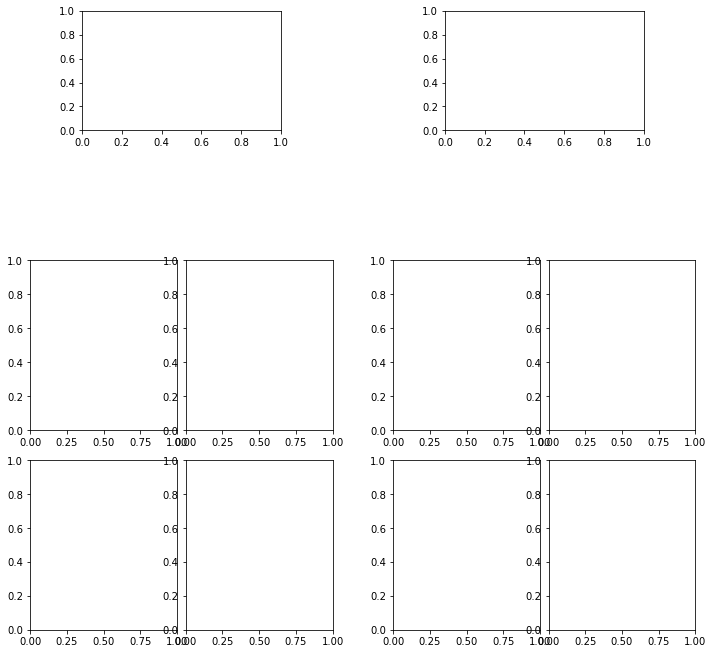

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def my_plot():
    fig = plt.figure(figsize=(12, 10), constrained_layout=False)
    spec = fig.add_gridspec(ncols=13, nrows=13, top=0.91, hspace=1.5)

    ax0 = fig.add_subplot(spec[0:3, 1:5])
    ax1 = fig.add_subplot(spec[5:9, :3])
    ax2 = fig.add_subplot(spec[9:, :3])

    #ax3 = fig.add_subplot(spec[0:2, 3:6])
    ax4 = fig.add_subplot(spec[5:9, 3:6])
    ax5 = fig.add_subplot(spec[9:, 3:6])

    ax6 = fig.add_subplot(spec[0:3, 8:12])
    ax7 = fig.add_subplot(spec[5:9, 7:10])
    ax8 = fig.add_subplot(spec[9:, 7:10])

    #ax9 = fig.add_subplot(spec[0:2, 10:])
    ax10 = fig.add_subplot(spec[5:9, 10:])
    ax11 = fig.add_subplot(spec[9:, 10:])

    fig.subplots_adjust(right=0.87, left=0.1, bottom=0.05)
    
    return fig, np.array([ax0, ax6, ax1, ax2, ax4,ax5,ax7,ax8,ax10,ax11])
fig, axs= my_plot()

ecmwf : 0.28 mm/h
WMRG
ICON-2.5km : 0.32 mm/h
WMRG
ICON-20km : 0.33 mm/h
WMRG
ICON-80km : 0.36 mm/h
WMRG
ICON-20km-conv : 0.31 mm/h
WMRG
ICON-80km-conv : 0.32 mm/h
WMRG


/scratch-local/slurm-job-tmp-3083490/ipykernel_48/2639642261.py:107: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = axs[j*4+2*i+2].pcolormesh(xx, yy, wnd.T, cmap=newcmap, vmin= -1.5,vmax=1.5)
/scratch-local/slurm-job-tmp-3083490/ipykernel_48/2639642261.py:112: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  imt = axs[j*4+2*i+3].pcolormesh(xx, yy, t.T, cmap=newcmap, vmin= -0.3,vmax=0.3)


Text(0, 0.5, 'Height [hPa]')

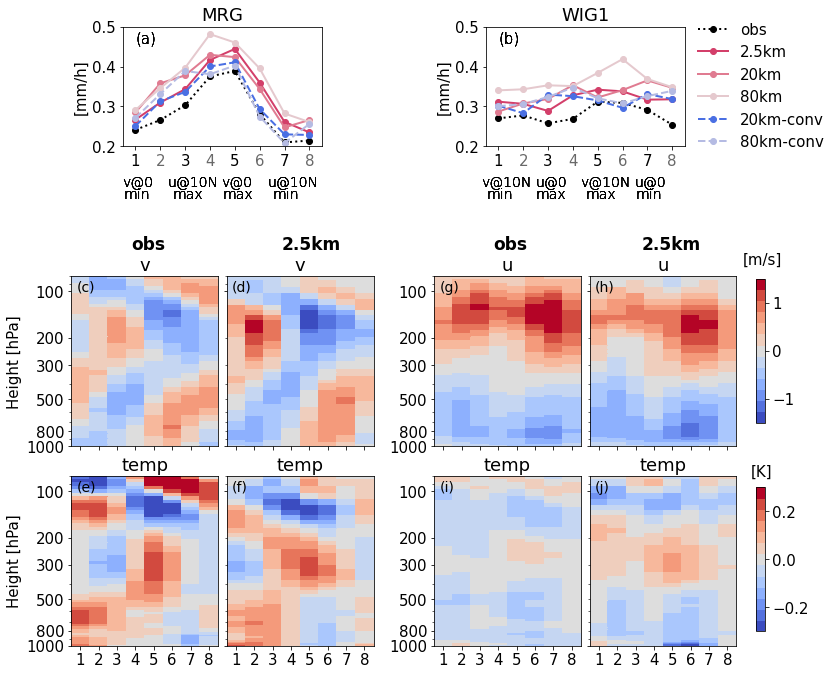

In [4]:
import xarray as xr
import sys
import pandas as pd
import pickle
import os
from enstools.misc import swapaxis
from matplotlib.ticker import MultipleLocator
sys.path.append('scripts')
from phase8 import Phase
from matplotlib import cm
from matplotlib.colors import ListedColormap
%matplotlib inline

plt.rcParams.update({'font.size': 15})
newcmap = cm.get_cmap("coolwarm", 13)
fig, axs= my_plot()

HOME=os.path.expanduser("~")
opath='%s/B6/Hyunju/prepare-dyamond/' % HOME

waves = ['WMRG','WG1']
wv_name = ['MRG','WIG1']

titles=['ecmwf','ICON-2.5km','ICON-20km','ICON-80km','ICON-20km-conv','ICON-80km-conv']
names = ['obs', '2.5km', '20km','80km','20km-conv','80km-conv']

#plt.style.use('dark_background')
sel_lat = {'Kelvin': 0.,'WG1': 10.,'WG2': 7.,
           'WMRG':0, 'EMRG':0, 'R1': 8.,'R2': 13., 'EG1':7.}
wv_wind = {'Kelvin': 'u_wave','WG1':'v_wave','WG2':'u_wave',
           'WMRG':'v_wave','EMRG': 'v_wave','R1':'v_wave','R2':'v_wave', 'EG1':'v_wave'}

wv_pair = {'WG1':'u_wave','WG2':'v_wave', 'WMRG':'u_wave',
           'EMRG': 'u_wave','R1':'u_wave','R2':'u_wave', 'EG1':'u_wave'}
lat_pair = {'WG1': 0. ,'WG2':13., 'WMRG': 10.,
           'EMRG': 8.,'R1': 0.,'R2':8., 'EG1': 13.}

colors = ['black', '#D33F6A', '#E07B91','#E5C9CE', '#4A6FE3','#B5BBE3']
lss = ['dotted', 'solid', 'solid', 'solid','dashed', 'dashed']
#colors = ['black', '#D33F6A', '#DA5F7D','#E07B91','#E495A5','#E6AFB9','#E5C9CE',
#         '#4A6FE3','#8595E1','#B5BBE3']
#lss = ['dotted', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid',
#      'dashed', 'dashed', 'dashed']
label_phase=['(a)', '(b)']

plev = 0
xt = np.arange(1,9,1)
dx = xt[1]-xt[0]
for i, od in enumerate(titles):
    prec=xr.open_dataset('%s%s/prec_1x1.nc' % (opath, od))['prec']
    prec=prec.sel(lat = slice(5,15)).mean('lat')*4/24.
    print("%s : %.2f mm/h" %(od, prec.mean().values))
    
    for j, wv in enumerate(waves):
        ds = xr.open_dataset('%s%s/yang_%s.nc' % (opath, od, wv))
        var = ds[wv_wind[wv]].sel(lat = sel_lat[wv]).isel(plev=plev)[0,...]
        W1 = var / var.std()
        
        W2 = ds[wv_pair[wv]].sel(lat=lat_pair[wv]).isel(plev=plev)[0,...]
        W2 = W2 / W2.std()
            
        if wv == 'R1' or wv == 'WMRG':
            W1 = -W1
            print(wv)
            
        prec_wv = Phase(value=prec[:,1:].copy(), W1=W1[:,1:], W2=W2)
            
        prec_wv = prec_wv.find_phase_id(ano=False)

        axs[j].plot(xt, prec_wv.phase_mean['var'], 'o', label = names[i] , lw=2, color=colors[i], ls=lss[i])
        axs[j].set_title(wv_name[j])
        axs[j].text(1, 0.46, label_phase[j], fontweight='light')
        
        axs[j].text(0.5, 0.07, 'min', fontweight='light', fontsize=14)
        axs[j].text(2.5, 0.07, 'max',fontweight='light', fontsize=14)
        axs[j].text(4.5, 0.07, 'max',fontweight='light', fontsize=14)
        axs[j].text(6.5, 0.07, 'min',fontweight='light', fontsize=14)
        axs[j].set_ylim(0.2,0.5)
        axs[j].set_ylabel('[mm/h]')
        
        if wv == 'WMRG':
            axs[j].text(0.45, 0.1, 'v@0',fontweight='light', fontsize=14)
            axs[j].text(2.3, 0.1, 'u@10N',fontweight='light', fontsize=14)
            axs[j].text(4.45, 0.1, 'v@0',fontweight='light', fontsize=14)
            axs[j].text(6.3, 0.1, 'u@10N',fontweight='light', fontsize=14)
        elif wv == 'WG1':
            axs[j].text(0.3, 0.1, 'v@10N',fontweight='light', fontsize=14)
            axs[j].text(2.5, 0.1, 'u@0',fontweight='light', fontsize=14)
            axs[j].text(4.3, 0.1, 'v@10N',fontweight='light', fontsize=14)
            axs[j].text(6.5, 0.1, 'u@0',fontweight='light', fontsize=14)
            
axs[1].legend( bbox_to_anchor=(1.0, 1.15), frameon=False)
    
labels=['(c)', '(e)', '(d)', '(f)',
       '(g)', '(i)', '(h)', '(j)']

for i, od in enumerate(titles[:2]):
    for j, wv in enumerate(wv_name):
        if wv == 'MRG':
            wnd = pickle.load(open('%sWK-filtering/pickle/WK_v_%s_%s_ml.pkl' % (opath, od, wv), 'rb'))
            #wnd = wnd.phase_mean['var']
        if wv == 'WIG1':
            wnd = pickle.load(open('%sWK-filtering/pickle/WK_u_%s_%s_ml.pkl' % (opath,od, wv), 'rb'))
            #wnd = wnd.phase_mean['var']
        
        xx,yy = np.meshgrid(np.arange(xt.min(), xt.max()+2*dx, dx) - 0.5*dx, wnd.level)
        im = axs[j*4+2*i+2].pcolormesh(xx, yy, wnd.T, cmap=newcmap, vmin= -1.5,vmax=1.5)
        axs[j*4+2*i+2].text(0.8,100,labels[j*4+2*i], fontsize=14)

        t = pickle.load(open('%sWK-filtering/pickle/WK_t_%s_%s_ml.pkl' % (opath,od, wv), 'rb'))
        #t = t.phase_mean['var']
        imt = axs[j*4+2*i+3].pcolormesh(xx, yy, t.T, cmap=newcmap, vmin= -0.3,vmax=0.3)
        axs[j*4+2*i+3].text(0.8,100,labels[j*4+2*i+1], fontsize=14)
    
cbaxes1 = fig.add_axes([0.893, 0.07, 0.01, 0.2])
cb1=fig.colorbar(imt,cax = cbaxes1, orientation='vertical')

cbaxes2 = fig.add_axes([0.893, 0.36, 0.01, 0.2])
cb2=fig.colorbar(im,cax = cbaxes2, orientation='vertical')

fig.text(0.17, 0.6, 'obs', fontweight='bold', fontsize=17)
fig.text(0.343, 0.6, '2.5km', fontweight='bold', fontsize=17)
fig.text(0.588, 0.6, 'obs', fontweight='bold', fontsize=17)
fig.text(0.76, 0.6, '2.5km', fontweight='bold', fontsize=17)

#fig.text(0.89, 0.74, 'qv')
fig.text(0.877, 0.58, '[m/s]')

#fig.text(0.878, 0.34, 'temp')
fig.text(0.887, 0.285, '[K]')

for ax in axs.flat:
    #ax.set_xticks([])
    ax.set_xlim(0.5,8.5)
    ax.set_xticks(xt)

for i in list([2,4,6,8]):
    axs[0].get_xticklabels()[i-1].set_color("dimgray")
    axs[1].get_xticklabels()[i-1].set_color("dimgray")
    
for ax in axs[2:]:
    ax.set_yscale('log')
    ax.set_ylim(1000, 80)
    ax.set_yticklabels([])

labels=['v','v','u','u']
for i, ax in enumerate(list([axs[2],axs[4],axs[6],axs[8]])):
    ax.set_xticklabels([])
    ax.set_title(labels[i])
    
for ax in list([axs[3],axs[5],axs[7],axs[9]]):
    ax.set_title('temp')
    
ylevel=[1000,800,500,300,200,100]
for ax in list([axs[2],axs[3],axs[6],axs[7]]):
    #ax.set_xticks([])
    ax.set_yticks(ylevel)
    ax.set_yticklabels([str(y) for y in ylevel])

axs[2].set_ylabel('Height [hPa]')
axs[3].set_ylabel('Height [hPa]')
#plt.savefig('composite.png')

# for Figures Sx

(10, 3)


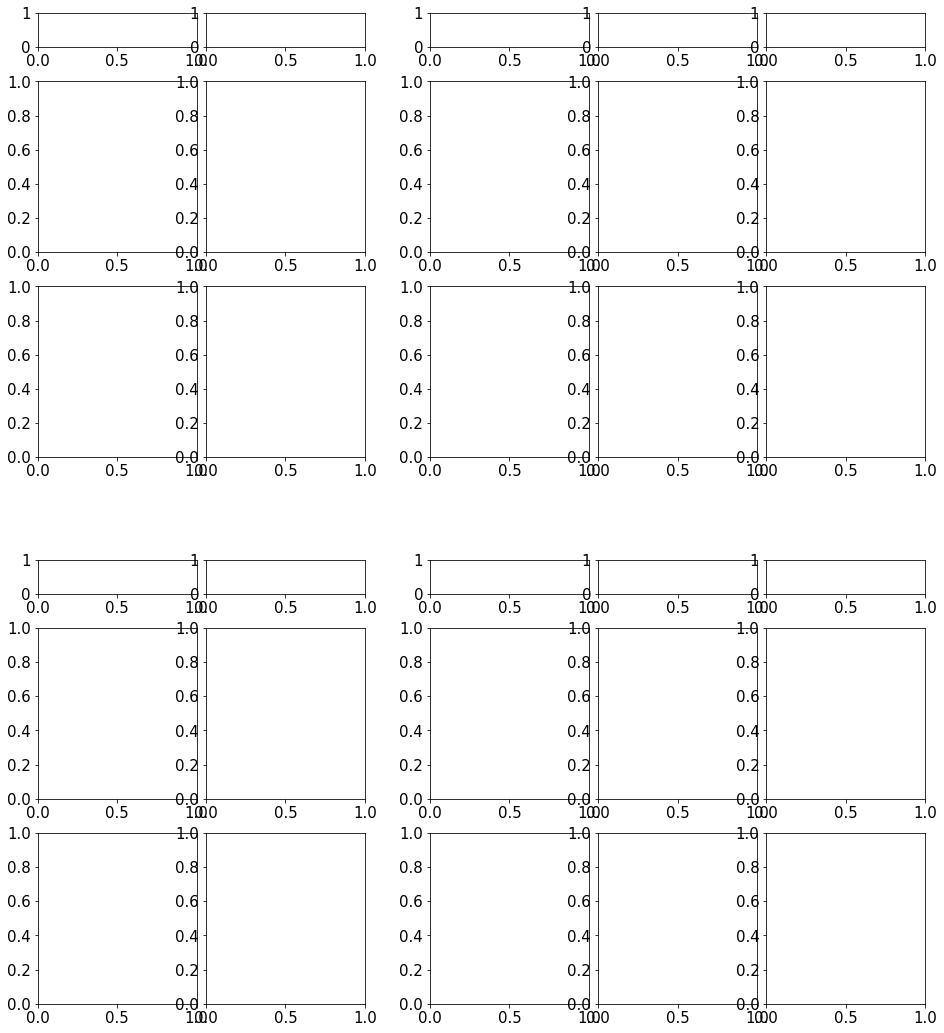

In [5]:
def my_plot_10():
    fig = plt.figure(figsize=(16, 16), constrained_layout=False)
    spec = fig.add_gridspec(ncols=16, nrows=15, top=0.91, hspace=1.)

    ax000 = fig.add_subplot(spec[0, :3])
    ax001 = fig.add_subplot(spec[1:4, :3])
    ax002 = fig.add_subplot(spec[4:7, :3])

    ax003 = fig.add_subplot(spec[0, 3:6])
    ax004 = fig.add_subplot(spec[1:4, 3:6])
    ax005 = fig.add_subplot(spec[4:7, 3:6])

    ax006 = fig.add_subplot(spec[0, 7:10])
    ax007 = fig.add_subplot(spec[1:4, 7:10])
    ax008 = fig.add_subplot(spec[4:7, 7:10])

    ax009 = fig.add_subplot(spec[0, 10:13])
    ax010 = fig.add_subplot(spec[1:4, 10:13])
    ax011 = fig.add_subplot(spec[4:7, 10:13])
    
    ax012 = fig.add_subplot(spec[0, 13:])
    ax013 = fig.add_subplot(spec[1:4, 13:])
    ax014 = fig.add_subplot(spec[4:7, 13:])
    
    ax100 = fig.add_subplot(spec[8, :3])
    ax101 = fig.add_subplot(spec[9:12, :3])
    ax102 = fig.add_subplot(spec[12:, :3])

    ax103 = fig.add_subplot(spec[8, 3:6])
    ax104 = fig.add_subplot(spec[9:12, 3:6])
    ax105 = fig.add_subplot(spec[12:, 3:6])

    ax106 = fig.add_subplot(spec[8, 7:10])
    ax107 = fig.add_subplot(spec[9:12, 7:10])
    ax108 = fig.add_subplot(spec[12:, 7:10])

    ax109 = fig.add_subplot(spec[8, 10:13])
    ax110 = fig.add_subplot(spec[9:12, 10:13])
    ax111 = fig.add_subplot(spec[12:, 10:13])
    
    ax112 = fig.add_subplot(spec[8, 13:])
    ax113 = fig.add_subplot(spec[9:12, 13:])
    ax114 = fig.add_subplot(spec[12:, 13:])


    fig.subplots_adjust(right=0.87, left=0.1, bottom=0.05)
    
    return fig, np.array([[ax000, ax001, ax002], [ax003,ax004,ax005], [ax006,ax007,ax008], [ax009,ax010,ax011],[ax012,ax013,ax014],
                         [ax100, ax101, ax102], [ax103,ax104,ax105], [ax106,ax107,ax108], [ax109,ax110,ax111],[ax112,ax113,ax114]])
fig, axs= my_plot_10()
print(axs.shape)

[Text(0, 1000, '1000'),
 Text(0, 800, '800'),
 Text(0, 500, '500'),
 Text(0, 300, '300'),
 Text(0, 100, '100')]

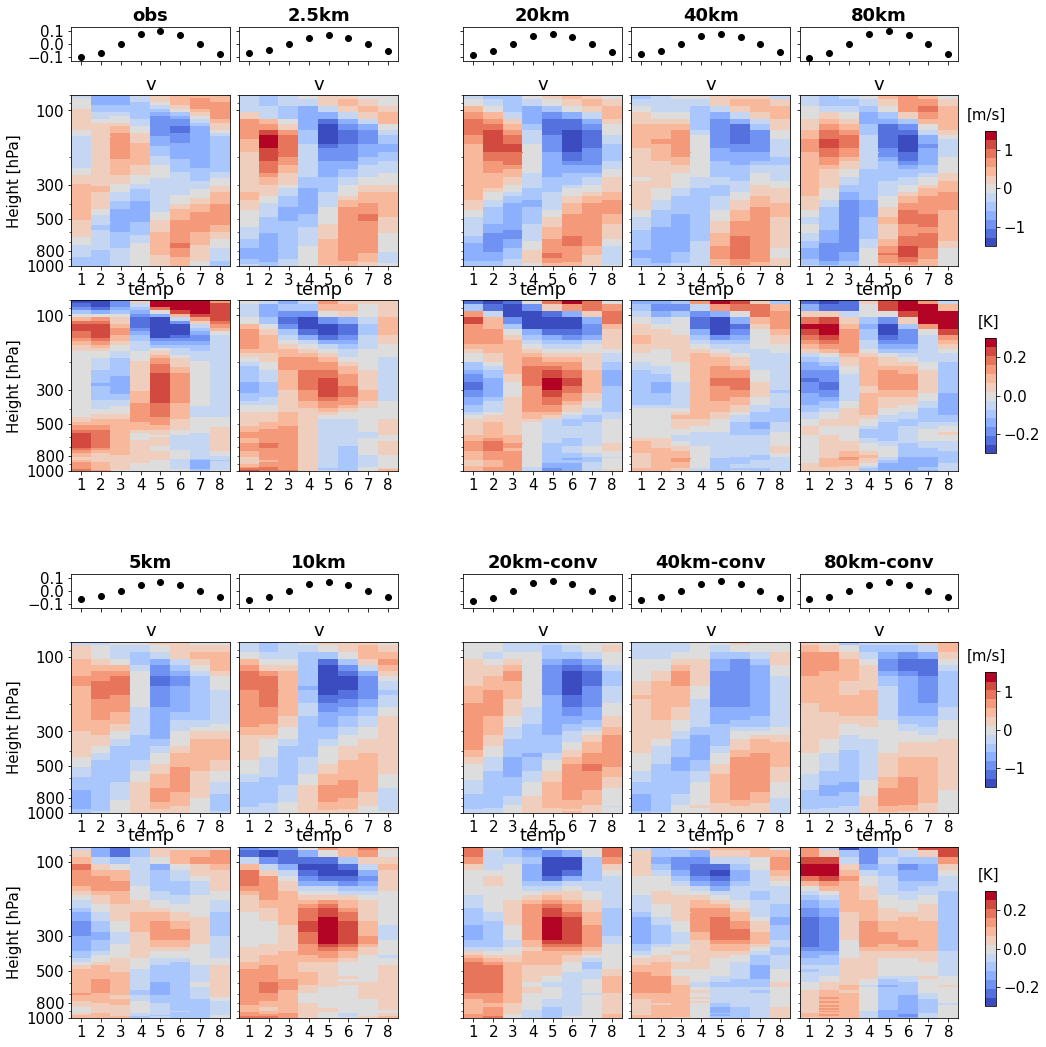

In [7]:
import warnings
warnings.filterwarnings('ignore')

import pickle
import matplotlib
newcmap = matplotlib.cm.get_cmap("coolwarm", 13)
plt.rcParams.update({'font.size': 15})

waves = ['MRG']
xt=np.arange(1,9,1)
dx = xt[1]-xt[0]

fig, axs= my_plot_10()

odirs=['ecmwf','ICON-2.5km','ICON-20km','ICON-40km', 'ICON-80km',
        'ICON-5km','ICON-10km','ICON-20km-conv','ICON-40km-conv','ICON-80km-conv']

for i, od in enumerate(odirs):
    for j, wv in enumerate(waves[:1]):
        if od == 'ecmwf':
            title = 'obs'
        else:
            title = od[5:]
            
        precip = pickle.load(open('%sWK-filtering/pickle/WK_wind_%s_%s.pkl' % (opath, od, wv), 'rb'))
        axs[i,0].plot(xt, precip , 'o', label = 'obs' , color='black', lw=2)
        axs[i,0].set_title(title,fontweight="bold")
        axs[i,0].set_ylim(-0.13,0.13)
        if wv == 'MRG' or wv == 'ER' :
            wnd = pickle.load(open('%sWK-filtering/pickle/WK_v_%s_%s_ml.pkl' % (opath, od, wv), 'rb'))
            #wnd = wnd.phase_mean['var']
            ax_titles = 'v'
        if wv == 'WIG1' or wv == 'Kelvin' or wv == 'EIG':
            wnd = pickle.load(open('%sWK-filtering/pickle/WK_u_%s_%s_ml.pkl' % (opath, od, wv), 'rb'))
            #wnd = wnd.phase_mean['var']
            ax_titles = 'u'
        
        xx,yy = np.meshgrid(np.arange(xt.min(), xt.max()+2*dx, dx) - 0.5*dx, wnd.level)
        im = axs[i,1].pcolormesh(xx, yy, wnd[:,1:].T, cmap=newcmap, vmin= -1.5,vmax=1.5)

        t = pickle.load(open('%sWK-filtering/pickle/WK_t_%s_%s_ml.pkl' % (opath, od, wv), 'rb'))
        #t = t.phase_mean['var']
        #xx,yy = np.meshgrid(np.arange(xt.min(), xt.max()+2*dx, dx) - 0.5*dx, t.level)
        imt = axs[i,2].pcolormesh(xx, yy, t[:,1:].T, cmap=newcmap, vmin= -0.3,vmax=0.3)

cbaxes2 = fig.add_axes([0.893, 0.72, 0.01, 0.1])
cb2=fig.colorbar(im,cax = cbaxes2, orientation='vertical')

cbaxes2 = fig.add_axes([0.893, 0.54, 0.01, 0.1])
cb2=fig.colorbar(imt,cax = cbaxes2, orientation='vertical')

cbaxes1 = fig.add_axes([0.893, 0.25, 0.01, 0.1])
cb1=fig.colorbar(im,cax = cbaxes1, orientation='vertical')

cbaxes1 = fig.add_axes([0.893, 0.06, 0.01, 0.1])
cb1=fig.colorbar(imt,cax = cbaxes1, orientation='vertical')

#fig.text(0.89, 0.74, 'qv')
fig.text(0.877, 0.83, '[m/s]')
fig.text(0.887, 0.65, '[K]')
fig.text(0.877, 0.36, '[m/s]')
fig.text(0.887, 0.17, '[K]')
fig.patch.set_facecolor('white')
#fig.text(0.878, 0.34, 'temp')

for ax in axs.flat:
    #ax.set_xticks([])
    ax.set_xlim(0.5,8.5)
    ax.set_xticks(xt)
    
for ax in axs[:,1:].flat:
    ax.set_yscale('log')
    ax.set_yticklabels([]) 

for ax in axs[1:5,0].flat:
    ax.set_yticklabels([])
for ax in axs[6:,0].flat:
    ax.set_yticklabels([])
    
for i in range(len(odirs)):
    #axs[i, 1].set_ylim(1000, 300)
    axs[i, 0].set_xticklabels([])
    axs[i, 1].set_title(ax_titles)
    axs[i, 2].set_title('temp')
    axs[i, 1].set_ylim(1000, 80)
    axs[i, 2].set_ylim(1000, 80)

ylevel=[1000,800,500,300,100]
axs[0, 1].set_yticks(ylevel)
axs[0, 1].set_ylabel('Height [hPa]')
axs[0, 1].set_yticklabels([str(y) for y in ylevel])

axs[0, 2].set_yticks(ylevel)
axs[0, 2].set_ylabel('Height [hPa]')
axs[0, 2].set_yticklabels([str(y) for y in ylevel])

axs[5, 1].set_yticks(ylevel)
axs[5, 1].set_ylabel('Height [hPa]')
axs[5, 1].set_yticklabels([str(y) for y in ylevel])

axs[5, 2].set_yticks(ylevel)
axs[5, 2].set_ylabel('Height [hPa]')
axs[5, 2].set_yticklabels([str(y) for y in ylevel])

#plt.savefig('%sWK-filtering/fig/%s_SI.png' % (opath, wv))